<a href="https://colab.research.google.com/github/nastenkass/homeworkMachineLearning/blob/main/%D0%94%D0%97_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Загрузим данные.

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


**Задание 1.** Вывести на экран размеры таблицы

In [7]:
print(f'Количество строк - {data.shape[0]} \nКоличество столбцов - {data.shape[1]}')

Количество строк - 891 
Количество столбцов - 12


# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Вывести основные числовые характеристики числовых столбцов.

In [13]:
# каждый столбец это признак
number_colums = data.select_dtypes(include=['int64', 'float64'])
print(number_colums.min())
print(number_colums.max())
print(number_colums.mean())
print(number_colums.median())
print(number_colums.quantile(0.75))

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64
PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64
PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверить, есть ли пропуски в столбце.

In [24]:
print(f"Колво пассажиров с неизвестным полом - {data.value_counts('Sex')[2]}")

Колво пассажиров с неизвестным полом - 5


In [15]:
data.value_counts("Sex")

Sex
male       574
female     312
unknown      5
dtype: int64

**Задание 4.** Удалить пассажиров неизвестного пола, так как их всего 5.

In [30]:
mask = data["Sex"] == 'unknown'
data[mask].drop
data[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


In [14]:
data.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать?

**Задание 5.** Придумать кодировку и применить её.

In [35]:
#data["Sex"].replace(['male', 'female'], [0, 1], inplace=True)
#data['Sex'] = data['Sex'].apply(lambda x: 0 if x == 'male' else 1)
def change_sex(x):
  match x:
    case "male":
      return 1
    case "female":
      return 0

data["Sex"] = data["Sex"].apply(change_sex)


data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,None,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,None,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,None,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),None,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,None,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,None,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,None,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",None,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,None,26.0,0,0,111369,30.0000,C148,C


Посмотрим, как влияет пол на выживаемость.

<ipython-input-50-3339ba5950af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, palette='summer')
<ipython-input-50-3339ba5950af>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(x='Sex', y='Survived', data=data, palette='summer')


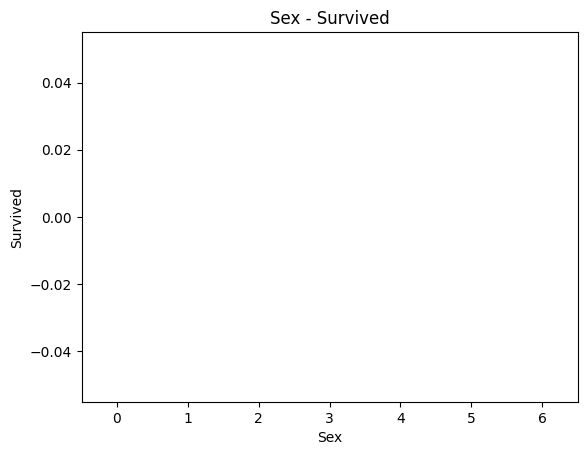

In [50]:
import seaborn as sns

sns.barplot(x='Sex', y='Survived', data=data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

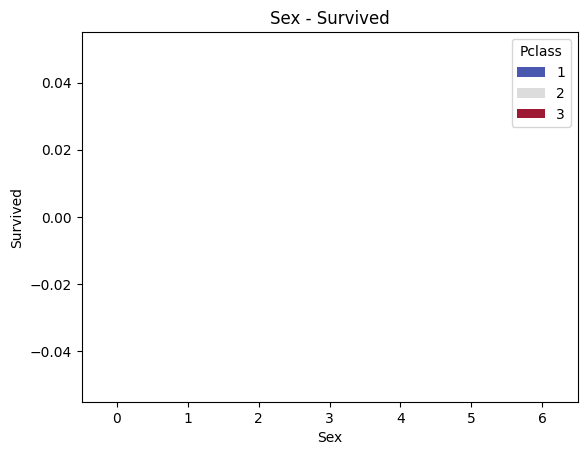

In [48]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data, palette='coolwarm')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

ValueError: List of boxplot statistics and `positions` values must have same the length

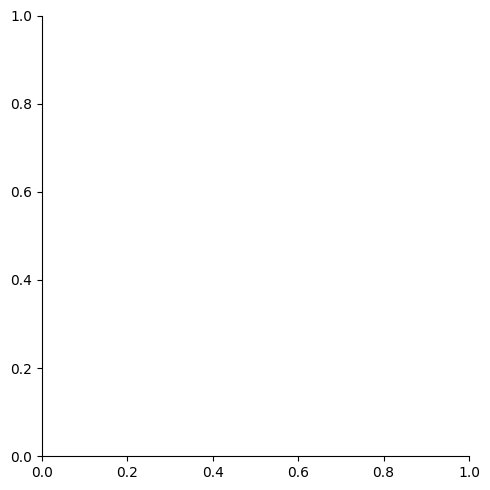

In [51]:
sns.catplot(x="Sex", y="Age", data=data, kind="box")
plt.show()

Полоска внутри - медиана<br>
По краям квадратов - 1 и 3 квартили (25 и 75 процентиль)<br>
Усы - некые границы, за пределы которых обычно не выходят больше 1% наблюдений<br>
Точки за усами - выбросы

Можно детализировать картинку, добавив разделение по Pclass.

UnboundLocalError: local variable 'boxprops' referenced before assignment

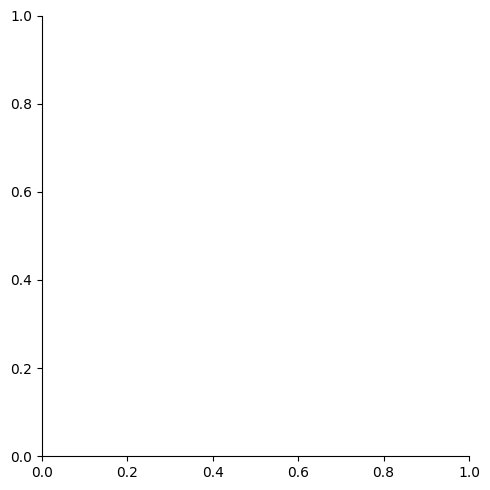

In [52]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=data, kind="box")
plt.show()

**Обработаем признак 'Embarked' (порт посадки)**

In [56]:
print(data['Embarked'].value_counts(dropna=False))
data.shape

S    644
C    168
Q     77
Name: Embarked, dtype: int64


(889, 12)

**Задание 6.** Удалить из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [55]:
# удаления строк или столбцов, содержащих пропущенные значения (NaN, None или NaT)
data.dropna(subset=["Embarked"], inplace=True)
data.shape

(889, 12)

**One-Hot Encoding** - это метод представления категориальных данных в виде векторов бинарных значений. Полезен при работе с категориальными данными, чтобы избежать ошибочного установления порядка или веса между категориями и обеспечить более точное представление входных данных для алгоритмов машинного обучения.

<br>

**Label Encoding**
| Label | Encoding | Calories |
|-------------|-------------|-------------|
| Apple | 1 | 95 |
| Chicken | 2 | 231 |
| Broccoli | 3 | 50 |

**One Hot Encoding**
| Apple | Chicken | Broccoli | Calories |
|----------|----------|---------|----------|
| 1 | 0 | 0 | 95 |
| 0 | 1 | 0 | 231 |
| 0 | 0 | 1 | 50 |



Переведем категориальный столбец в числовые с помощью OneHotEncoding, а именно, создадим три числовых столбца следующим образом:

In [ ]:
# data['EmbS'] = data.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# data['EmbC'] = data.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# data['EmbQ'] = data.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

Эту операцию можно сделать с помощью метода get_dummies.

In [57]:
# преобразования категорий переменных в dummy или индикаторные переменные (как будто таблица истинности)
pd.get_dummies(data['Embarked'], dtype=int)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


**Задание 7.** Удалить из таблицы Data категориальный столбец Embarked и добавить в неё новые столбцы, полученные с помощью get_dummies.

In [58]:
dummies = pd.get_dummies(data['Embarked'], dtype=int)
data.drop(["Embarked"], axis=1, inplace=True)

# конкатенация или объединение фреймов данных вдоль определенной оси (строк или столбцов) с помощью логики множеств вдоль других осей
data = pd.concat((data, dummies), axis=1)

In [59]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,Braund; Mr. Owen Harris,None,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,None,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,Heikkinen; Miss. Laina,None,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),None,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,Allen; Mr. William Henry,None,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,None,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,Graham; Miss. Margaret Edith,None,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",None,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,Behr; Mr. Karl Howell,None,26.0,0,0,111369,30.0000,C148,1,0,0


**Обработаем признак 'Age'**

Проверим, если ли в Age пропущенные значения.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          0 non-null      object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  C            889 non-null    int64  
 12  Q            889 non-null    int64  
 13  S            889 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 136.5+ KB


Заполним пропуски медианным значением Age.

In [63]:
median_age = data['Age'].median()

data['Age'].fillna(median_age, inplace=True)

data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

Нарисуем распределение возраста пассажиров.

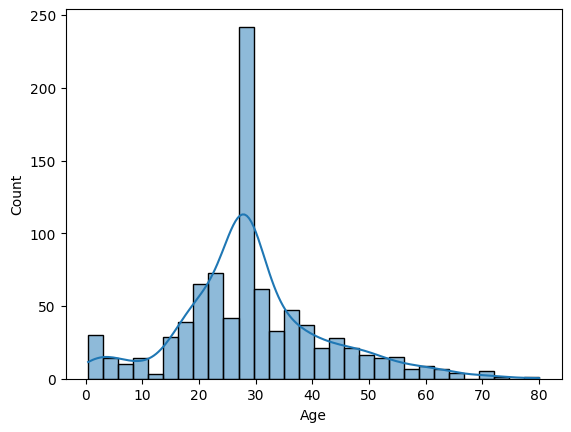

In [62]:
sns.histplot(data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

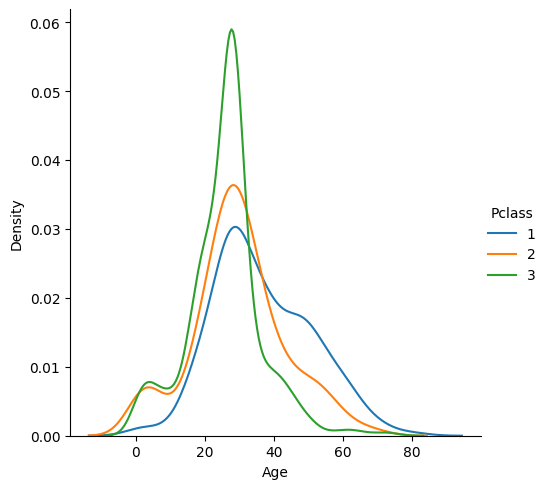

In [73]:
facet = sns.FacetGrid(data = data, hue = "Pclass", legend_out=True, height= 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend()

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [65]:
data['Pclass'].value_counts(dropna=False)

3    491
1    214
2    184
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

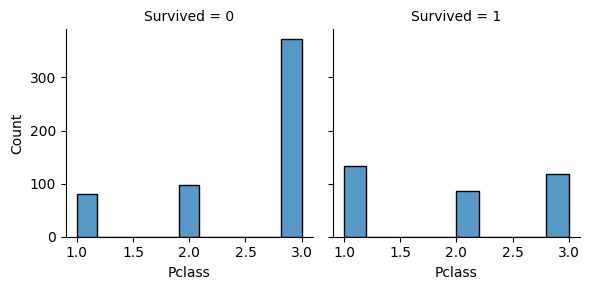

In [82]:
sur = sns.FacetGrid(data=data, col="Survived", margin_titles=True)
sur.map(sns.histplot, "Pclass")
plt.show()

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [85]:
data.drop(columns=["PassengerId"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,0,3,Braund; Mr. Owen Harris,None,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,None,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,1,3,Heikkinen; Miss. Laina,None,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),None,35.0,1,0,113803,53.1000,C123,0,0,1
4,0,3,Allen; Mr. William Henry,None,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Montvila; Rev. Juozas,None,27.0,0,0,211536,13.0000,NaN,0,0,1
887,1,1,Graham; Miss. Margaret Edith,None,19.0,0,0,112053,30.0000,B42,0,0,1
888,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",None,28.0,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,1,1,Behr; Mr. Karl Howell,None,26.0,0,0,111369,30.0000,C148,1,0,0


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной.

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [86]:
NumericData = data._get_numeric_data()
NumericData.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1


<Axes: title={'center': 'Pearson Correlation of Features'}>

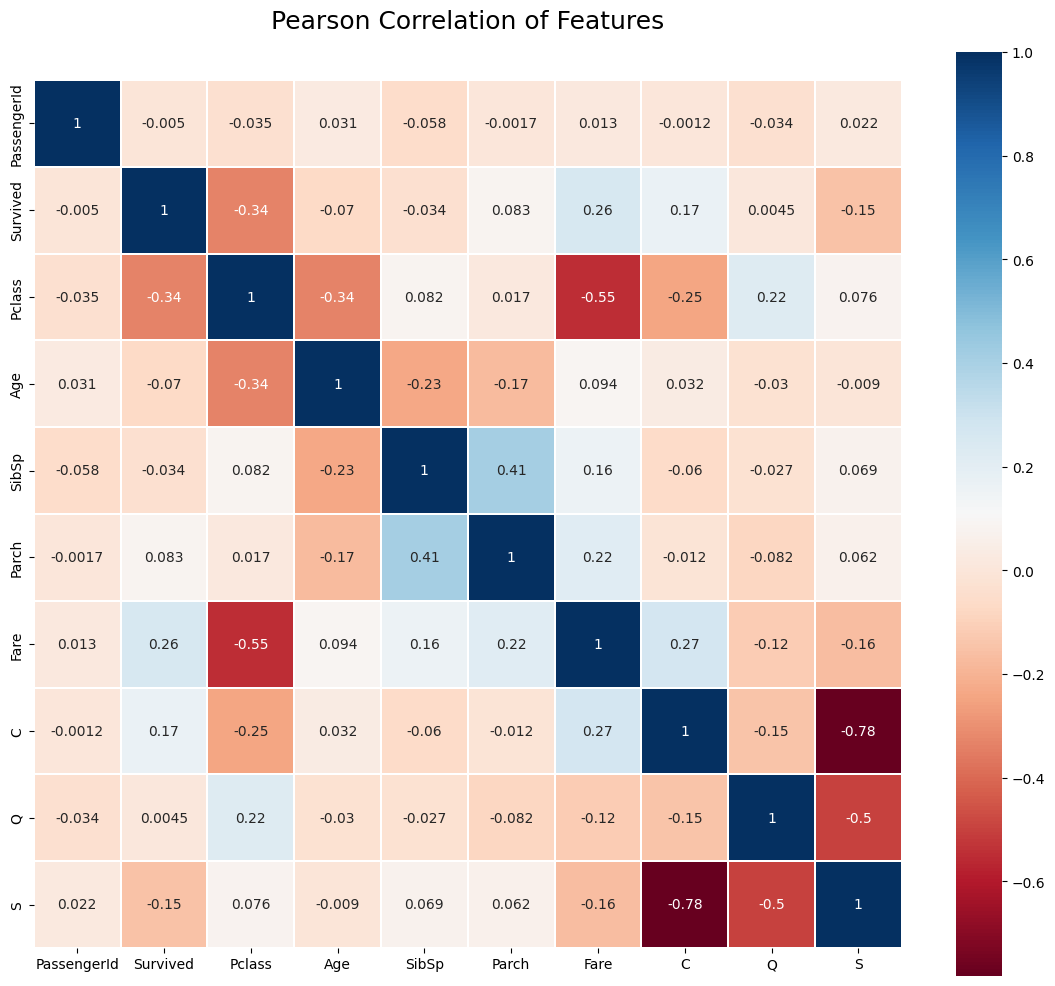

In [87]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

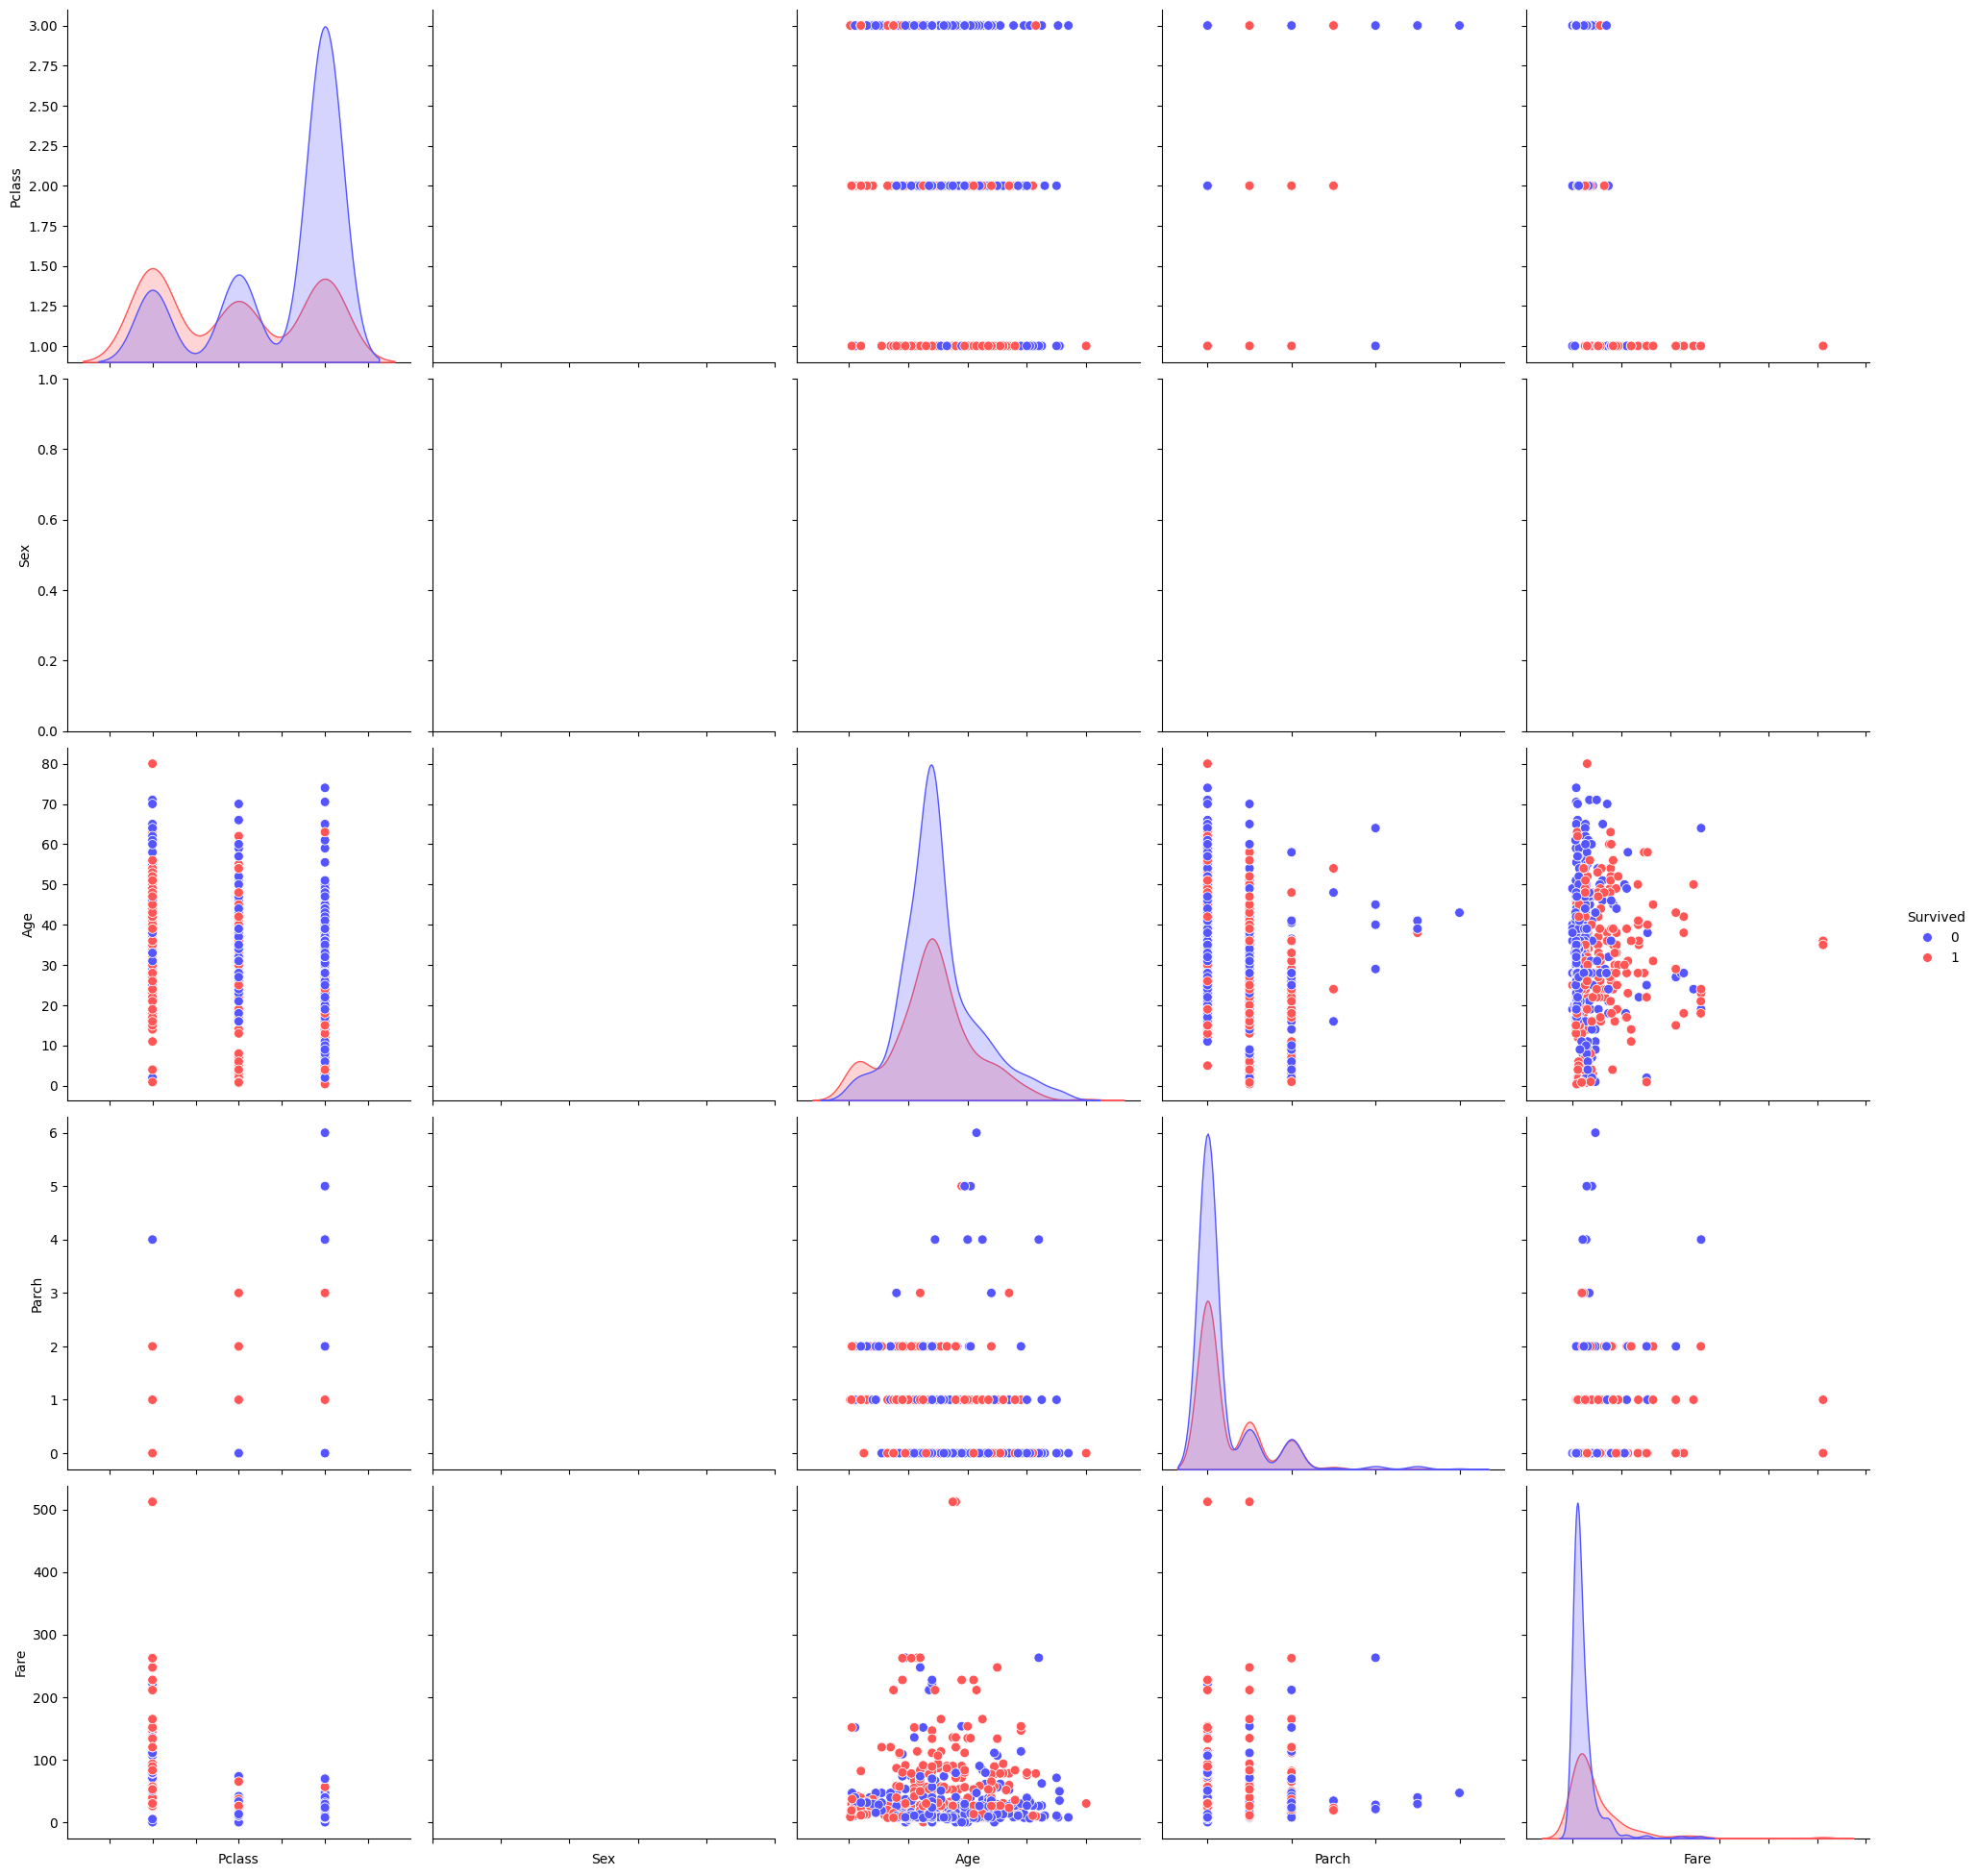

In [88]:
g = sns.pairplot(data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', height=4, diag_kind = 'kde', \
                 diag_kws=dict(fill=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [89]:
data['AgeBin'] = pd.cut(data['Age'].astype(int), 5)
data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] <
                                           (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [90]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['AgeBin_Code'] = label.fit_transform(data['AgeBin'])

data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [96]:
data['FareBin'] = pd.cut(data['Fare'].astype(int), 4)
data['FareBin'].head()

labelfare = LabelEncoder()

data['FareBin_Code'] = labelfare.fit_transform(data['FareBin'])

data[['Fare','FareBin','FareBin_Code']].head()

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.512, 128.0]",0
1,71.2833,"(-0.512, 128.0]",0
2,7.9250,"(-0.512, 128.0]",0
3,53.1000,"(-0.512, 128.0]",0
4,8.0500,"(-0.512, 128.0]",0


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [107]:
data = data.assign(NameLen=lambda row: row["Name"].str.len())

In [112]:
data = data.assign(FamilySize=lambda row: row["Parch"] + row["SibSp"] + 1)

In [125]:
data = data.assign(IsAlone=lambda row: 0)
data['IsAlone'] = data.apply(lambda x: 0 if x["FamilySize"] > 1 else 1, axis=1)

In [126]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,1,0,3,Braund; Mr. Owen Harris,None,22.0,1,0,A/5 21171,7.2500,...,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23,2,0
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,None,38.0,1,0,PC 17599,71.2833,...,1,0,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51,2,0
2,3,1,3,Heikkinen; Miss. Laina,None,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22,1,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),None,35.0,1,0,113803,53.1000,...,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44,2,0
4,5,0,3,Allen; Mr. William Henry,None,35.0,0,0,373450,8.0500,...,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,None,27.0,0,0,211536,13.0000,...,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,21,1,1
887,888,1,1,Graham; Miss. Margaret Edith,None,19.0,0,0,112053,30.0000,...,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,28,1,1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",None,28.0,1,2,W./C. 6607,23.4500,...,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,40,4,0
889,890,1,1,Behr; Mr. Karl Howell,None,26.0,0,0,111369,30.0000,...,1,0,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,21,1,1


**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

In [130]:
new_colums = ['NameLen', 'FamilySize', 'IsAlone', 'Survived', 'AgeBin',	'AgeBin_Code',	'FareBin',	'FareBin_Code']
new_data = data[new_colums]

new_data

,NameLen,FamilySize,IsAlone,Survived,AgeBin,AgeBin_Code,FareBin,FareBin_Code
0,23,2,0,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0
1,51,2,0,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0
2,22,1,1,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0
3,44,2,0,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0
4,24,1,1,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0
...,...,...,...,...,...,...,...,...
886,21,1,1,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0
887,28,1,1,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0
888,40,4,0,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0
889,21,1,1,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0


<ipython-input-131-86415a86aafa>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(),


<Axes: title={'center': 'Pearson Correlation of Features'}>

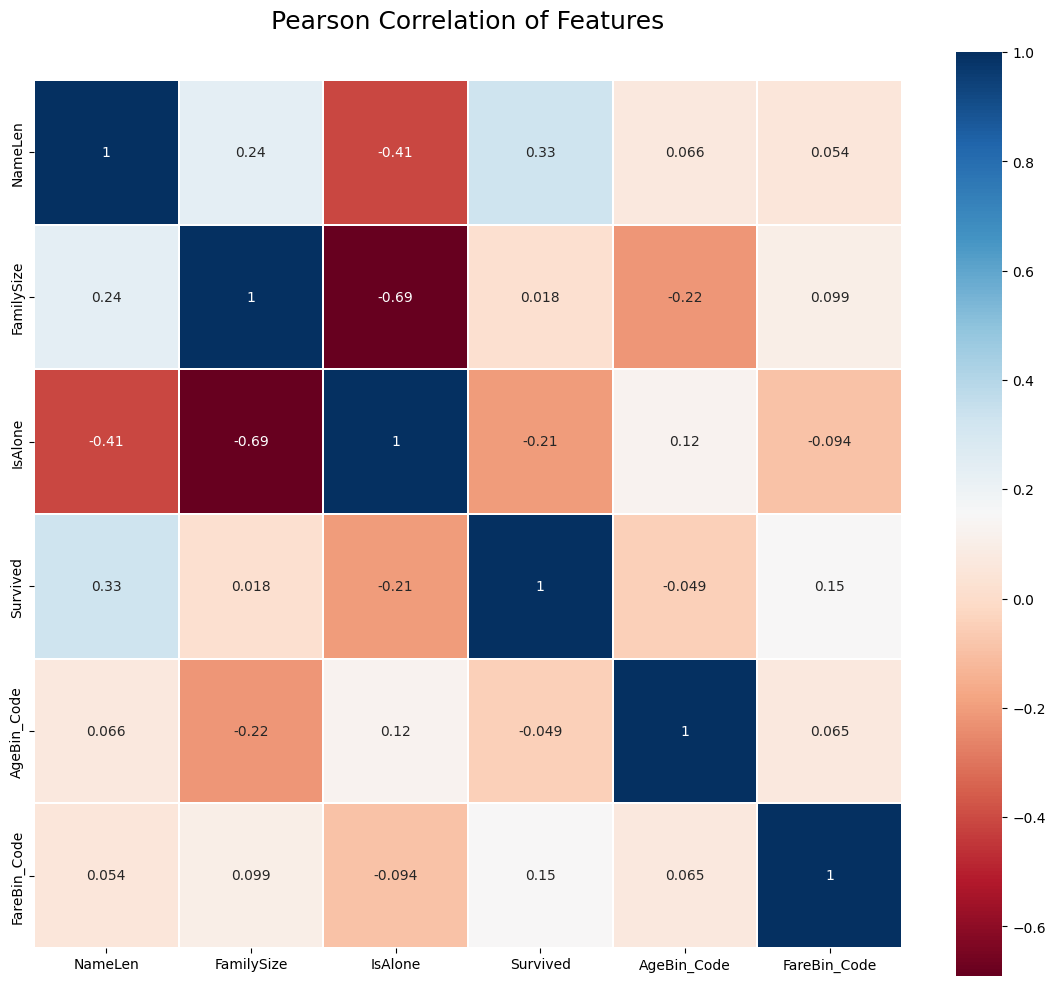

In [131]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(new_data.corr(),
            linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

**Задание 14.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [137]:
#признаки "Хронические заболевания", "Материальное положение"

#Возможность наличия хронического заболевания
data = data.assign(ChronicDisease=lambda row: 0)

def possibility_disease(row):
    age = row["Age"]
    pclass = row["Pclass"]

    chronic_probability = 0.1
    if age > 20:
        chronic_probability += 0.1 * ((age - 20) // 5)

    chronic_probability += 0.2 * (pclass == 1) + 0.3 * (pclass == 2) + 0.4 * (pclass == 3)

    return int(chronic_probability >= 0.7)


data['ChronicDisease'] = data.apply(possibility_disease, axis=1)

In [171]:
def finance(row):
    fare = row["Fare"]
    age = row["Age"]
    sex = row["Sex"]
    median_fare = data["Fare"].median()

    FARE_WEIGHT = 0.7
    AGE_WEIGHT = 0.2
    SEX_WEIGHT = 0.1

    if np.isnan(fare):
        fare = median_fare

    normalized_fare = (fare - median_fare) / (data["Fare"].quantile(0.99) - data["Fare"].quantile(0.01))
    age_min = data["Age"].min()
    age_max = data["Age"].max()
    age_score = max(((age - age_min) / (age_max - age_min)), 0.1)

    female_factor = 0.3 if sex == "female" else 0.7

    total_score = (normalized_fare * FARE_WEIGHT + age_score * AGE_WEIGHT + female_factor * SEX_WEIGHT)

    return total_score

data['FinancialSituation'] = data.apply(lambda x: finance(x), axis=1)

In [172]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone,ChronicDisease,FinancialSituation
0,1,0,3,Braund; Mr. Owen Harris,None,22.0,1,0,A/5 21171,7.2500,...,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23,2,0,0,0.104007
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,None,38.0,1,0,PC 17599,71.2833,...,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51,2,0,0,0.324012
2,3,1,3,Heikkinen; Miss. Laina,None,26.0,0,0,STON/O2. 3101282,7.9250,...,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22,1,1,0,0.115955
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),None,35.0,1,0,113803,53.1000,...,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44,2,0,0,0.265417
4,5,0,3,Allen; Mr. William Henry,None,35.0,0,0,373450,8.0500,...,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24,1,1,1,0.138924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,None,27.0,0,0,211536,13.0000,...,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,21,1,1,0,0.132718
887,888,1,1,Graham; Miss. Margaret Edith,None,19.0,0,0,112053,30.0000,...,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,28,1,1,0,0.160345
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",None,28.0,1,2,W./C. 6607,23.4500,...,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,40,4,0,0,0.164573
889,890,1,1,Behr; Mr. Karl Howell,None,26.0,0,0,111369,30.0000,...,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,21,1,1,0,0.177937


<ipython-input-176-6b32b33a3eef>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data2.corr(),


<Axes: title={'center': 'Pearson Correlation of Features'}>

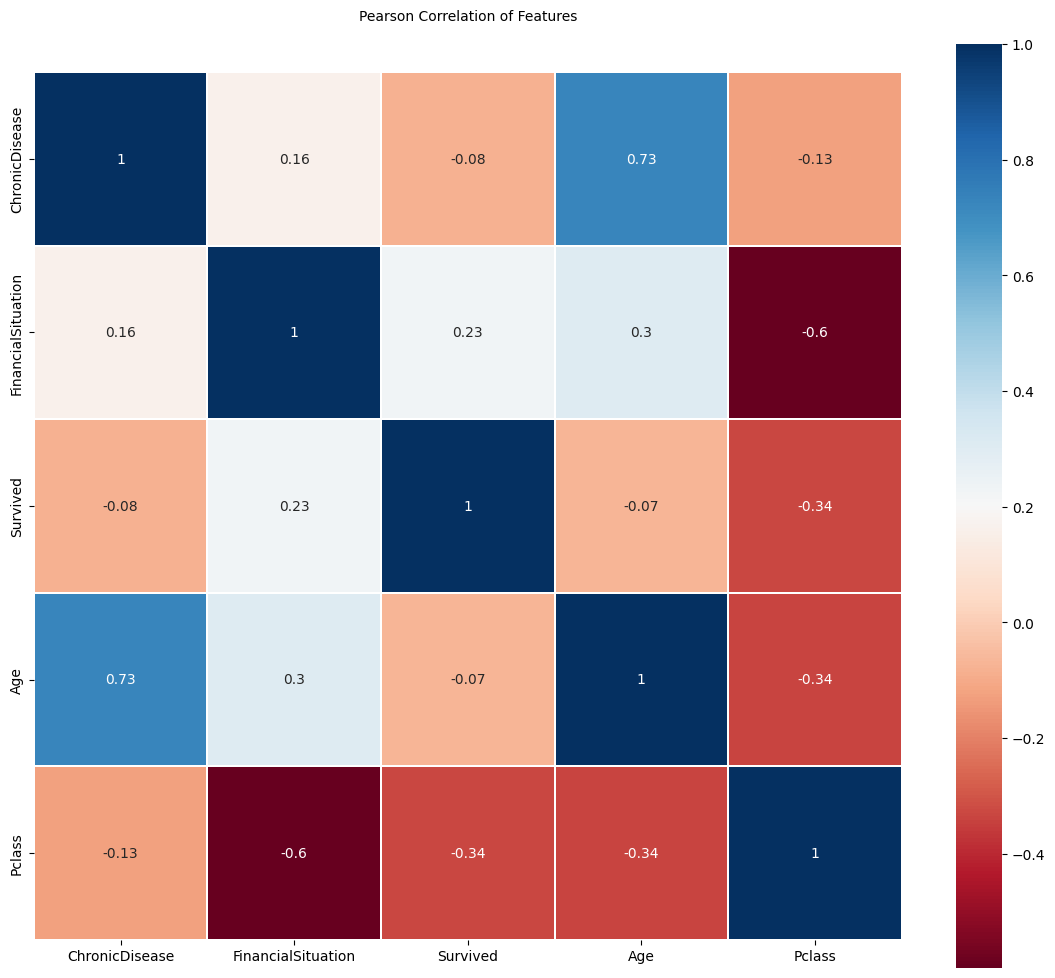

In [176]:
new_colums2 = ['ChronicDisease', 'FinancialSituation', 'Survived', 'Age', 'Pclass', 'Sex']
new_data2 = data[new_colums2]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=10)
sns.heatmap(new_data2.corr(),
            linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

Если признак имеет низкую корреляцию с целевой переменной (в данном случае – выживаемостью), это не обязательно означает, что признак не влияет на выживаемость или является бесполезным для решения задачи. Корреляция может быть низкой из-за различных причин, таких как сложные взаимодействия между признаками, нелинейные связи, а также наличие шума в данных.